In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from utils import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

label_dict = { 0: "T-Shirt/Top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle Boot"}

In [3]:
print(f'X_test Shape: {X_test.shape}\ny_test Shape: {y_test.shape}\nX_train Shape: {X_train.shape}\ny_train Shape: {y_train.shape}')

X_test Shape: (10000, 784)
y_test Shape: (10000,)
X_train Shape: (60000, 784)
y_train Shape: (60000,)


In [4]:
# Create validation sets from the first 10,000 images
X_val = X_train[:10000]
y_val = y_train[:10000]

# Start training sets from the 10,001th image to accomodate validation set
X_train = X_train[10000:]
y_train = y_train[10000:]

# Start training sets from the 10,001th image to the 20,000th image as a subset of the data
X_train_subset = X_train[10000:20000]
y_train_subset = y_train[10000:20000]

In [5]:
def visualize(y_labels: np.array) -> None:
    # Some default settings for our plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

    # Create a figure with 3 rows and 3 columns
    figure, axes = plt.subplots(3, 3, figsize=(6, 6))  

    n = 0
    for row in range(len(axes)):
        for col in range(len(axes[0])):
            axes[row][col].set_title(f' Label: {label_dict[y_labels[n]]}')
            axes[row][col].imshow(X_train[n].reshape(28, 28))
            n += 1

    plt.tight_layout()

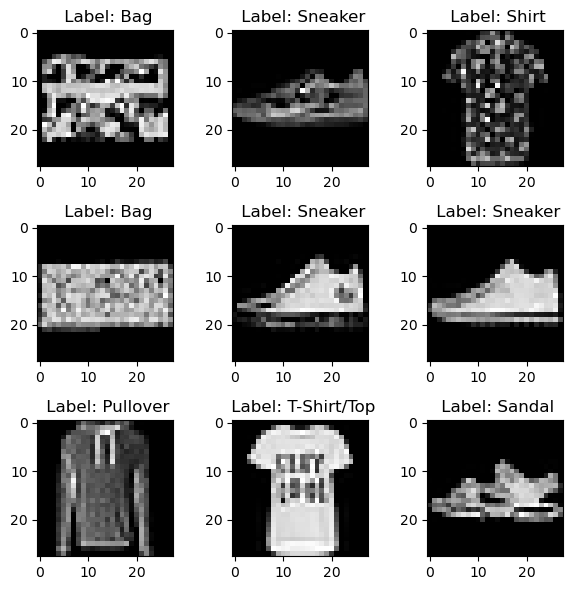

In [6]:
visualize(y_train)

/Users/jamesgxu/anaconda3/envs/cs178/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


finished


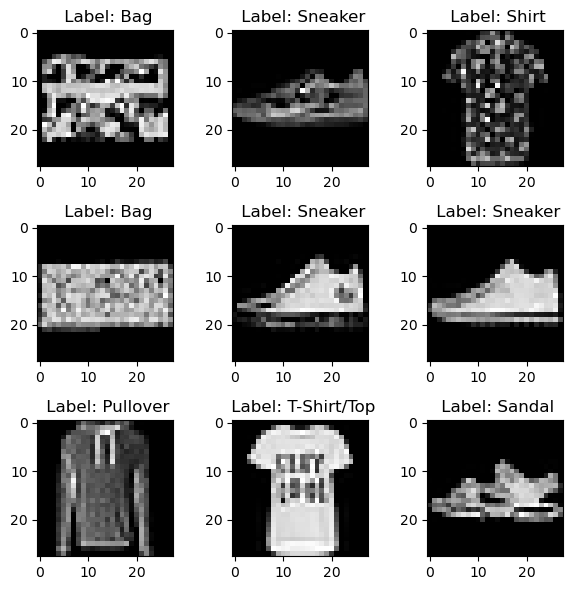

In [8]:
lr = LogisticRegression(solver="liblinear").fit(X_train[:5000], y_train[:5000])
print('finished')
y_lr_pred = lr.predict(X_train)

visualize(y_lr_pred)